<center>
    <span><h4><b>
        Routes quality prediction based on comments</b></h4></span>

 </center>



*   Route quality tells us the condition of the road, i.e. whether it is safe and there are no stones falling off, whether it is aesthetic or is unpleasant to climb
*   We found this feature quite important when recommending roads, however we noticed a lot of missing information about route quality. Therefore, we decided to make a quality prediction based on the comments.
*  After analyzing the data, we noticed that the comments were entered in different languages, so we decided to translate all comments into English.


*  Initially we wanted to use Googletrans which is a free and unlimited python library that implemented Google Translate API, however, our data was too large and due to too many requests sent to api, we got blocked.
*  Therefore, we used the Google Translate document translation option to translate all comments.






####Loading all needed tools and libraries.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import io 
import glob 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading data

In [ ]:
translatedData = pdtranslatedData.read_csv('/content/drive/MyDrive/DM_CLIMBING/all_unique.csv', encoding='latin-1')

In order to be able to predict quality, we decided to transform the categorical features to numeric

In [ ]:
## dictionary encrypts categories into numbers
dict_quality = {'mega classic':5 , 'classic' : 4,'very good':3, 'good':2, 'average':1}

In [ ]:
## changing based on dictionary
translatedData = translatedData.replace(dict_quality)
translatedData['quality'] = translatedData['quality'].fillna(0)

In [ ]:
translatedData.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,type,route,crag,sector,date,commentRich,quality,style,country,region,grade
0,0,73050.0,125543.0,sport,Four For Glory,Brar,NaN,21/10/2018,#FA # 2go just perfect,5,redpoint,albania,NaN,8.25
1,1,60734.0,109775.0,sport,Apache KId,B,NaN,19/06/2011,"finally, with good conditions i managed to hol...",0,redpoint,andorra,NaN,8.05
2,2,136341.0,196758.0,trad,Bare Trap,Lupupa,big orange boulder,06/09/2015,#FA Trad Heinous overhanging # 4 and # 5 crack...,3,redpoint,angola,NaN,7.25
3,3,136497.0,196943.0,trad,Roof Crack,Lupupa,big orange boulder,06/09/2015,#FA Trad Pretty proud little crack. If it wasn...,3,redpoint,angola,NaN,7.20
4,4,170715.0,239181.0,sport,..2 finger pockets..,Valle encantado,NaN,10/12/2012,# 2go upper part of the 7b .. really leve like...,5,redpoint,argentina,NaN,8.00


In [ ]:
## taking rows where quality is not provided (= 0)
nonquality = translatedData[translatedData['quality'] == 0]

In [ ]:
nonquality = nonquality[nonquality['route'].notna()] 

In [ ]:
translatedData.columns = translatedData.columns.str.strip()


In [ ]:
translatedData.dtypes

Unnamed: 0          int64
Unnamed: 0.1      float64
Unnamed: 0.1.1    float64
type               object
route              object
crag               object
sector             object
date               object
commentRich        object
quality             int64
style              object
country            object
region             object
grade             float64
dtype: object

In [ ]:
len(translatedData)

58489

remove null values from "commentRich" column

In [ ]:
translatedData = translatedData.drop(translatedData[(translatedData['commentRich'].isnull())].index)
#translatedData['quality'] = translatedData['quality'].fillna(0)



In [ ]:
path='/content/drive/MyDrive/DM_CLIMBING/models'

In [ ]:
from fastai.text import *

drop all the unuseful columns for the quality rediction

In [ ]:
translatedData.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','crag','date','region','sector'], axis=1, inplace=True)

In [ ]:
translatedData.dtypes

type            object
route           object
commentRich     object
quality          int64
style           object
country         object
grade          float64
dtype: object

In [ ]:
len(translatedData)

42429

In [ ]:
cut = int(0.2 * len(translatedData)) + 1
train_df, valid_df = translatedData[cut:], translatedData[:cut]

create the data bunch

In [ ]:
data_l = TextLMDataBunch.from_df(path, train_df, valid_df, text_cols=['commentRich'])

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
learn = language_model_learner(data_l, AWD_LSTM, drop_mult=0.3)

Finding best learning rate

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


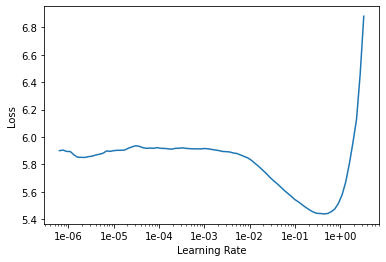

In [ ]:
learn.recorder.plot()

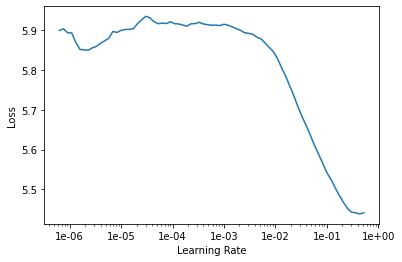

In [ ]:
learn.recorder.plot(skip_end=15)

Choosing best learning rate based on previous calculations

In [ ]:
learn.fit_one_cycle(2, slice(1e-3,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.491413,4.382213,0.241590,00:28
1,3.962870,4.142281,0.260172,00:29


In [ ]:
learn.save('lang_model_first')

In [ ]:
learn.load('lang_model_first')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (33943 items)
x: LMTextList
xxbos # xxup fa go left before the crux of xxmaj not xxup xxunk . a little bit easier than that .,xxbos hard bouldering passage with a small bar and open holes . xxmaj certainly not 8 + as in the climbing guide,xxbos xxmaj one of the best overhanging and athletic rout in this grade i 've ever climbed .,xxbos first part easy , hard left out , but nice bouldery section . 7 in mouse .,xxbos xxmaj leprosy
y: LMLabelList
,,,,
Path: /content/drive/MyDrive/DM_CLIMBING/models;

Valid: LabelList (8486 items)
x: LMTextList
xxbos # xxup fa # 2go just perfect,xxbos finally , with good conditions i managed to hold the last hold of the bulder , than shaking till the chain . ( xxmaj bed ),xxbos # xxup fa xxmaj trad xxmaj heinous overhanging # 4 and # 5 crack . xxmaj had to invert twice ! xxmaj at first i thought it was 5.12 , but after coming back to xxmaj yosemite and climbing on other xxunk i 'm xxunk . . . hardest 

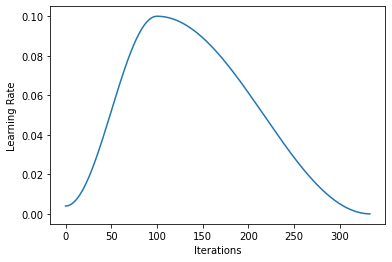

In [ ]:
learn.recorder.plot_lr()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-3,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.856107,4.293967,0.235124,00:38
1,3.840402,4.059651,0.266143,00:40
2,3.601272,4.004638,0.271540,00:41
3,3.177300,4.039537,0.270169,00:41
4,2.625087,4.233495,0.263600,00:42


In [ ]:
learn.save('lang_model_second')

In [ ]:
learn.load('lang_model_second')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (33943 items)
x: LMTextList
xxbos # xxup fa go left before the crux of xxmaj not xxup xxunk . a little bit easier than that .,xxbos hard bouldering passage with a small bar and open holes . xxmaj certainly not 8 + as in the climbing guide,xxbos xxmaj one of the best overhanging and athletic rout in this grade i 've ever climbed .,xxbos first part easy , hard left out , but nice bouldery section . 7 in mouse .,xxbos xxmaj leprosy
y: LMLabelList
,,,,
Path: /content/drive/MyDrive/DM_CLIMBING/models;

Valid: LabelList (8486 items)
x: LMTextList
xxbos # xxup fa # 2go just perfect,xxbos finally , with good conditions i managed to hold the last hold of the bulder , than shaking till the chain . ( xxmaj bed ),xxbos # xxup fa xxmaj trad xxmaj heinous overhanging # 4 and # 5 crack . xxmaj had to invert twice ! xxmaj at first i thought it was 5.12 , but after coming back to xxmaj yosemite and climbing on other xxunk i 'm xxunk . . . hardest 

In [ ]:
initial_text = "it's a good route!"
words = 40
sentences = 10 



In [ ]:
print ("\n".join(learn.predict(initial_text, words, temperature=0.75) for _ in range(sentences)))

it's a good route! xxbos If you start from the original start , it 's not easy , but it is weird ... i have to do more stuff ... xxbos Cousin shot did not do it at all , even though
it's a good route! xxbos # 2go nice one xxbos # 2go fuck with the OS ! It is the only one that has hit me , i do not like it xxbos # 2go xxbos Three days of work ,
it's a good route! xxbos Great route ! xxbos Awesome crack climbing . Really nice ! Love the canyon rock . Back in business . xxbos # 2go Tough one , tricky and technical with just one sequence
it's a good route! ! ! Fell after the last move on the onsight . Did it 3rd go today . Easy second go ! Psyched ! Big moves on tiny crimps and even a tufa finish .
it's a good route! xxbos Finally the first free ascent after Luca Zardini Canon 's FA :) What a fight , one of the best routes i 've ever done xxbos VI.4 + / VI.5 xxbos
it's a good route! xxbos Good moves . Better than it looks ! xxbos Nice short route with some reachy moves . Fell off the last 

In [ ]:
learn.save_encoder('language_model_encoder')

In [ ]:
train_df.dtypes

type            object
route           object
commentRich     object
quality          int64
style           object
country         object
grade          float64
dtype: object

In [ ]:
data_c = TextDataBunch.from_df(path, train_df, valid_df, text_cols=["commentRich"], label_cols=["quality"])

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
learn = text_classifier_learner(data_c, AWD_LSTM, drop_mult=0.5)

In [ ]:
learn.load_encoder("language_model_encoder")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (33943 items)
x: TextList
xxbos # xxup fa go left before the crux of xxmaj not xxup xxunk . a little bit easier than that .,xxbos hard bouldering passage with a small bar and open holes . xxmaj certainly not 8 + as in the climbing guide,xxbos xxmaj one of the best overhanging and athletic rout in this grade i 've ever climbed .,xxbos first part easy , hard left out , but nice bouldery section . 7 in mouse .,xxbos xxmaj leprosy
y: CategoryList
3,3,5,5,0
Path: /content/drive/MyDrive/DM_CLIMBING/models;

Valid: LabelList (8486 items)
x: TextList
xxbos # xxup fa # 2go just perfect,xxbos finally , with good conditions i managed to hold the last hold of the bulder , than shaking till the chain . ( xxmaj bed ),xxbos # xxup fa xxmaj trad xxmaj heinous overhanging # 4 and # 5 crack . xxmaj had to invert twice ! xxmaj at first i thought it was 5.12 , but after coming back to xxmaj yosemite and climbing on other xxunk i 'm xxunk . . . hardest r

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


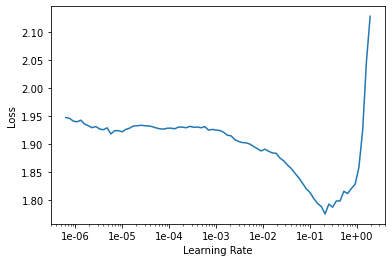

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, slice(1e-3,1e-1),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.334351,1.338318,0.441669,00:24
1,1.270791,1.286734,0.441786,00:26


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn.save('first_round')

As in prevoius model we get accuracy about 0.4 we are going to try improve it, and prepare second round of learning

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


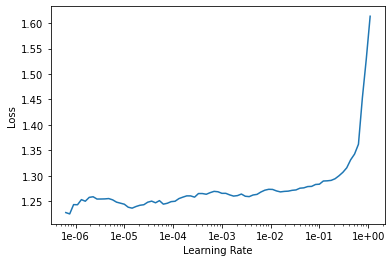

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, slice(1e-5,1e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.256888,1.283663,0.440726,00:58
1,1.227579,1.277816,0.444497,01:13
2,1.227623,1.286790,0.444143,01:14
3,1.225642,1.273036,0.447914,01:04


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn.save('second_round')

In [ ]:
learn.unfreeze()

In [ ]:
learn.load('second_round')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (33943 items)
x: TextList
xxbos # xxup fa go left before the crux of xxmaj not xxup xxunk . a little bit easier than that .,xxbos hard bouldering passage with a small bar and open holes . xxmaj certainly not 8 + as in the climbing guide,xxbos xxmaj one of the best overhanging and athletic rout in this grade i 've ever climbed .,xxbos first part easy , hard left out , but nice bouldery section . 7 in mouse .,xxbos xxmaj leprosy
y: CategoryList
3,3,5,5,0
Path: /content/drive/MyDrive/DM_CLIMBING/models;

Valid: LabelList (8486 items)
x: TextList
xxbos # xxup fa # 2go just perfect,xxbos finally , with good conditions i managed to hold the last hold of the bulder , than shaking till the chain . ( xxmaj bed ),xxbos # xxup fa xxmaj trad xxmaj heinous overhanging # 4 and # 5 crack . xxmaj had to invert twice ! xxmaj at first i thought it was 5.12 , but after coming back to xxmaj yosemite and climbing on other xxunk i 'm xxunk . . . hardest r

#### Checking if our model works:

In [ ]:
learn.predict('Really loved this route!')

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


(Category tensor(5),
 tensor(5),
 tensor([0.1817, 0.0063, 0.0014, 0.0911, 0.0310, 0.6886]))

In [ ]:
learn.predict('it is very hard!')

(Category tensor(0),
 tensor(0),
 tensor([0.4860, 0.0605, 0.0032, 0.1863, 0.0077, 0.2563]))

In [ ]:
learn.predict('it was a great experience!')[1].item()

5

In [ ]:
learn.predict('nice choice to do !')[1].item()

5

#### Predict quality for all rows where quality is not provided

In [ ]:
nonquality['quality'] = nonquality['commentRich'].apply(lambda x: learn.predict(x)[1].item())

In [ ]:
nonquality

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,type,route,crag,sector,date,commentRich,quality,style,country,region,grade
0,1,1,60734,109775,sport,Apache KId,B,NaN,19/06/2011,"finally, with good conditions i managed to hol...",5,redpoint,andorra,NaN,8.05
1,10,10,169737,235917,sport,Chunga Plus,Arenales,NaN,10/01/2020,# 2go,1,redpoint,argentina,NaN,8.05
2,32,32,169779,236355,sport,Puro bla bla,Valle encantado,NaN,01/12/2005,# 2go,1,redpoint,argentina,NaN,7.25
3,114,114,35045,54690,sport,Ergonomics,Unknown Crag,NaN,10/07/2012,Amazing rock. The best 7b + I've tried,5,redpoint,australia,Arapiles,7.15
4,247,247,228304,311072,sport,Sadomastication,Sublime Point,NaN,05/08/2018,# 2go Lowering off reigning steel. Tried the m...,5,redpoint,australia,Blue Mountains,7.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16149,58443,58443,81748,134967,sport,Tonalin,Riosecu,riosecu,07/08/2007,planting an egg !,1,onsight,unknown,NaN,7.25
16150,58447,58447,81835,135200,sport,tragasonic,rafales,rafales,10/06/2007,"#FA A Bloke, second go",1,redpoint,unknown,NaN,7.20
16151,58450,58450,223650,304904,sport,triathlon,Auburn,NaN,04/02/2005,# 2go choss,1,redpoint,unknown,NaN,7.15
16152,58466,58466,169787,236411,sport,Via Crucis,Santa Maria,NaN,01/08/2005,#DOES,3,redpoint,unknown,NaN,7.10


In [ ]:
translatedData = translatedData.drop(translatedData[translatedData.quality == 0].index)

In [ ]:
df_final = pd.concat([translatedData, nonquality])

In [ ]:
df_final.to_csv('/content/drive/MyDrive/DM_CLIMBING/all_qualities.csv')